<font size = 16> What are the most demanded skills for the top 3 most popular data roles?</font>

<h3 style="font-size: 16pt; text-decoration: underline;">Methodology</h1>

<p style="font-size: 12pt;">1. Clean-up skill column.</p>
<p style="font-size: 12pt;">2. Calculate skill count based on job_title_short.</p>
<p style="font-size: 12pt;">3. Calculate skill percentage.</p>
<p style="font-size: 12pt;">4. Plot total findings.</p>


In [56]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=  df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/sachintamangyonjan/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sun Sep 29 14:34:04 2024).


In [33]:
df_US = df[df['job_country'] == 'United States']

In [34]:
df_skills = df_US.explode('job_skills')

In [35]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [36]:
# Naming the column as skill_count and organising them in descending order
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by= 'skill_count',ascending= False, inplace= True)

In [37]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3]
job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

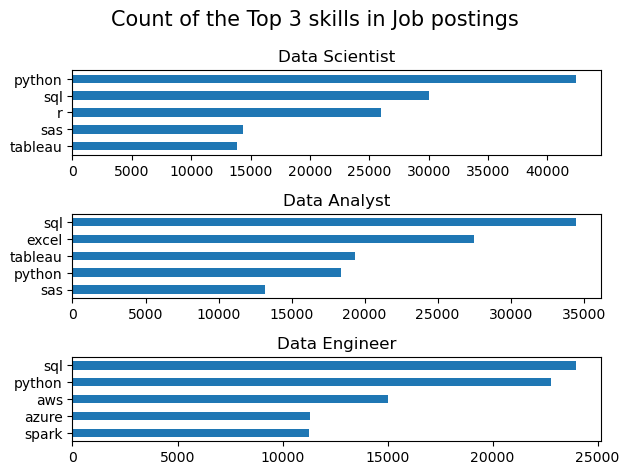

In [41]:
# Plot them all
fig, ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Count of the Top 3 skills in Job postings', fontsize = 15)
fig.tight_layout()
plt.show()
    

In [45]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [50]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count, how = 'left', on = 'job_title_short' )

df_skills_perc['skills_percent'] =100 * df_skills_perc['skill_count']/ df_skills_perc['jobs_total']
df_skills_perc 


,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


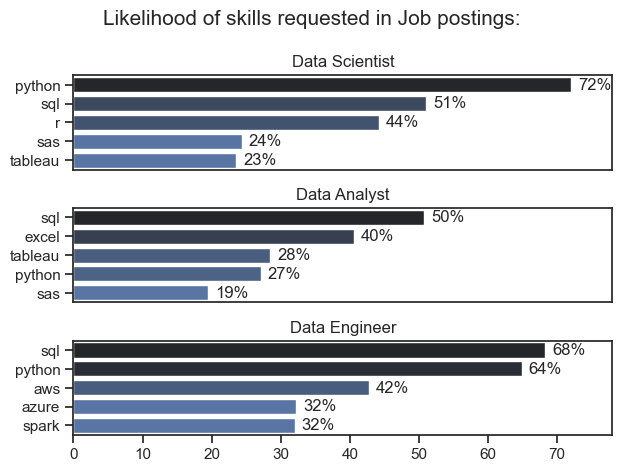

In [77]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skills_percent',  ax = ax[i], title = job_title)
    sns.barplot(data= df_plot, x = 'skills_percent', y = 'job_skills', hue = 'skill_count', ax = ax[i], palette= 'dark:b_r')
    # ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    
    for n,v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n, f'{int(v)}%' , va = 'center')
    
    if i != len(job_titles) - 1:
         ax[i].set_xticks([])
    
fig.suptitle('Likelihood of skills requested in Job postings:', fontsize = 15)
fig.tight_layout()
plt.show()